Enrico Grandi, Enrico Romano, Simone Lu, Lorenzo Antolini

# Task 0



In [ ]:
import pandas as pd 
import numpy as np
import seaborn as sns
import warnings
from matplotlib import pyplot as plt
from collections import Counter
warnings.filterwarnings('ignore')

In [ ]:
df_cb = pd.read_csv("clicks_bidding.csv")
df_cr = pd.read_csv("clicks_regular.csv")
df_pr_co = pd.read_csv("prices_competitor.csv")
df_pr_ca = pd.read_csv("product_catalog.csv") 
df_sd = pd.read_csv("sales_data.csv") 
df_sl = pd.read_csv("sellers_list.csv") 
df_st = pd.read_csv("stock.csv") 

# 1 -  Sales data

- It tracks all the purchases made by customers.

- On 2021-01-02 the product corresponding 
to the product_id 110853 has been 
purchased once (for a single transaction) 
by a customer (including taxes) at the 
price of 3990.
The regular price and the sales price are 
different if there are promotions or 
marketing campaigns for that product at 
that time

- Cleaning


![image.png](attachment:image.png)

In [ ]:
#new columns

df_sd["sales_tax"] = ((df_sd["sales_price_tax"]-df_sd["sales_price"])/df_sd["sales_price_tax"])
df_sd["regular_tax"] = ((df_sd["regular_price_tax"]-df_sd["regular_price"])/df_sd["regular_price_tax"])
df_sd["gross_profit"] = ((df_sd["sales_price_tax"]-df_sd["purchase_price"])/df_sd["sales_price_tax"])
df_sd["month"] = [str(x)[5:7] for x in df_sd["sale_date"]]

df_sd["profit"] = df_sd["sales_price"] - df_sd["purchase_price"]
df_sd["revenue"] = df_sd["sales_price"] * df_sd["quantity"]

df_sd["promotion_perc"] = df_sd["regular_price"] - df_sd["sales_price"]/ df_sd['regular_price'] *100

df_sd

,sale_date,product_id,quantity,sales_price_tax,regular_price_tax,sales_price,regular_price,purchase_price,sales_tax,regular_tax,gross_profit,month,profit,revenue,promotion_perc
0,2021-01-02,109751,1,2499.0,2777.0,2082.0,2313.8917,1499.4000,0.166867,0.166766,0.400000,01,582.6000,2082.0,2223.913418
1,2021-01-02,110853,1,3990.0,8322.0,3325.0,6935.1852,2833.7000,0.166667,0.166644,0.289799,01,491.3000,3325.0,6887.241275
2,2021-01-02,131410,1,2288.0,3767.0,1907.0,3138.8889,1860.0000,0.166521,0.166740,0.187063,01,47.0000,1907.0,3078.134918
3,2021-01-02,134294,1,4990.0,6666.0,4158.0,5554.6296,3599.4024,0.166733,0.166722,0.278677,01,558.5976,4158.0,5479.773124
4,2021-01-02,134298,1,5990.0,7777.0,4992.0,6480.5583,4199.4000,0.166611,0.166702,0.298932,01,792.6000,4992.0,6403.527900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119120,2021-12-31,184595,2,3290.0,4433.0,2742.0,3694.4444,2474.2500,0.166565,0.166604,0.247948,12,267.7500,5484.0,3620.224850
119121,2021-12-31,184647,1,1990.0,2878.0,1658.0,2398.1481,1638.0000,0.166834,0.166731,0.176884,12,20.0000,1658.0,2329.011419
119122,2021-12-31,184749,1,4990.0,5544.0,4158.0,4620.3704,3600.0000,0.166733,0.166600,0.278557,12,558.0000,4158.0,4530.377615
119123,2021-12-31,184809,1,2590.0,2878.0,2158.0,2398.1481,1650.0000,0.166795,0.166731,0.362934,12,508.0000,2158.0,2308.161998


In [ ]:
# check for null values
1-(len(df_sd.isna()))/len(df_sd)


0.0

In [ ]:
# converting datatype

df_sd['sales_price'] = df_sd['sales_price'].values.astype('float64')
df_sd['regular_price'] = df_sd['regular_price'].values.astype('float64')
df_sd['purchase_price'] = df_sd['purchase_price'].values.astype('float64')
df_sd['profit'] = df_sd['profit'].values.astype('float64')

In [ ]:
feature_list = ['sales_price','regular_price','purchase_price','profit'] 

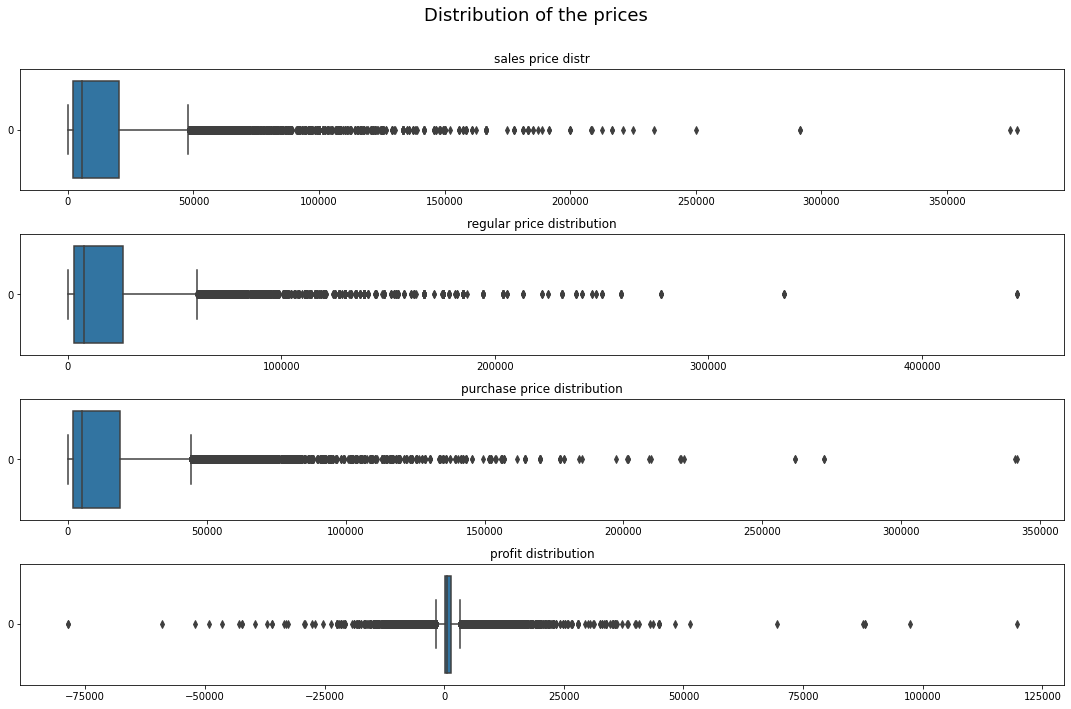

In [ ]:
fig, axes = plt.subplots(nrows=4, ncols=1,figsize=(15,10))
fig.suptitle('Distribution of the prices\n', size = 18)

sns.boxplot(df_sd['sales_price'], ax=axes[0], orient= "h")
axes[0].set_title("sales price distr");

sns.boxplot(df_sd['regular_price'], ax=axes[1], orient= "h")
axes[1].set_title("regular price distribution");

sns.boxplot(df_sd['purchase_price'], ax=axes[2], orient= "h")
axes[2].set_title("purchase price distribution");

sns.boxplot(df_sd['profit'], ax = axes[3], orient= "h")
axes[3].set_title("profit distribution");



plt.tight_layout()

## Tukey's IQR method

Tukey’s (1977) technique is used to detect outliers in skewed or non bell-shaped data since it makes no distributional assumptions. However, Tukey’s method may not be appropriate for a small sample size. The general rule is that anything not in the range of (Q1 - 1.5 IQR) and (Q3 + 1.5 IQR) is an outlier, and can be removed.

Inter Quartile Range (IQR) is one of the most extensively used procedure for outlier detection and removal.

In [ ]:
def IQR_method (df,n,features):
    """
    Takes a dataframe and returns an index list corresponding to the observations 
    containing more than n outliers according to the Tukey IQR method.
    """
    outlier_list = []
    
    for column in features:
                
        # 1st quartile (25%)
        Q1 = np.percentile(df[column], 25)
        # 3rd quartile (75%)
        Q3 = np.percentile(df[column],75)
        
        # Interquartile range (IQR)
        IQR = Q3 - Q1
        
        # outlier step
        outlier_step = 1.5 * IQR
        
        # Determining a list of indices of outliers
        outlier_list_column = df[(df[column] < Q1 - outlier_step) | (df[column] > Q3 + outlier_step )].index
        
        # appending the list of outliers 
        outlier_list.extend(outlier_list_column)
        
    # selecting observations containing more than x outliers
    outlier_list = Counter(outlier_list)        
    multiple_outliers = list( k for k, v in outlier_list.items() if v > n )
    
    # Calculate the number of records below and above lower and above bound value respectively
    df1 = df[df[column] < Q1 - outlier_step]
    df2 = df[df[column] > Q3 + outlier_step]
    
    print('Total number of outliers is:', df1.shape[0]+df2.shape[0])
    
    return multiple_outliers

In [ ]:
Outliers_IQR = IQR_method(df_sd,1,feature_list)

Total number of outliers is: 14665


In [ ]:
# drop outliers

df_out = df_sd.drop(Outliers_IQR, axis = 0).reset_index(drop=True)

In [ ]:
df_out.head()

,sale_date,product_id,quantity,sales_price_tax,regular_price_tax,sales_price,regular_price,purchase_price,sales_tax,regular_tax,gross_profit,month,profit,revenue,promotion_perc
0,2021-01-02,109751,1,2499.0,2777.0,2082.0,2313.8917,1499.4000,0.166867,0.166766,0.400000,01,582.6000,2082.0,2223.913418
1,2021-01-02,110853,1,3990.0,8322.0,3325.0,6935.1852,2833.7000,0.166667,0.166644,0.289799,01,491.3000,3325.0,6887.241275
2,2021-01-02,131410,1,2288.0,3767.0,1907.0,3138.8889,1860.0000,0.166521,0.166740,0.187063,01,47.0000,1907.0,3078.134918
3,2021-01-02,134294,1,4990.0,6666.0,4158.0,5554.6296,3599.4024,0.166733,0.166722,0.278677,01,558.5976,4158.0,5479.773124
4,2021-01-02,134298,1,5990.0,7777.0,4992.0,6480.5583,4199.4000,0.166611,0.166702,0.298932,01,792.6000,4992.0,6403.527900


In [ ]:
# grouping operations for a better view of the dataset

df_sd_grouped = df_sd.groupby(["product_id", "sale_date"]).agg({
    "quantity":"sum",
    "sales_price_tax":["mean","max","min"],
    "regular_price_tax":["mean","max","min"],
    "sales_price":["mean","max","min"],
    "regular_price":["mean","max","min"],
    "purchase_price":["mean","max","min"],
    "sales_tax":["mean"],
    "gross_profit":["mean","max","min"],
})


df_sd_grouped.columns = [
                        'quantity_count',
                        'sales_price_tax_mean',
                        'sales_price_tax_max',
                        'sales_price_tax_min',
                        'regular_price_tax_mean',
                        'regular_price_tax_max',
                        'regular_price_tax_min',
                        'sales_price_mean',
                        'sales_price_max',
                        'sales_price_min',
                        'regular_price_mean',
                        'regular_price_max',
                        'regular_price_min',
                        'purchase_price_mean',
                        'purchase_price_max',
                        'purchase_price_min',
                        'sales_tax_mean',
                        'gross_profit_mean',
                        'gross_profit_max',
                        'gross_profit_min',
                        ]

df_sd_grouped

quantity_count  sales_price_tax_mean  \
product_id sale_date                                          
100043     2021-01-22               1                 459.0   
           2021-03-17               1                 459.0   
           2021-03-31               1                 459.0   
           2021-12-31               1                 490.0   
100044     2021-02-08               1                 589.0   
...                               ...                   ...   
184860     2021-12-24               2               29990.0   
           2021-12-27               6               29990.0   
           2021-12-28               2               32490.0   
           2021-12-31               3               29990.0   
184913     2021-12-20               7               96990.0   

                       sales_price_tax_max  sales_price_tax_min  \
product_id sale_date                                              
100043     2021-01-22                459.0                459.0   
           2021-03-17                459.0                459.0   
           2021-03-31                459.0                459.0   
           2021-12-31                490.0                490.0   
100044     2021-02-08                589.0                589.0   
...                                    ...                  ...   
184860     2021-12-24              29990.0              29990.0   
           2021-12-27              29990.0              29990.0   
           2021-12-28              32490.0              32490.0   
           2021-12-31              29990.0              29990.0   
184913     2021-12-20              96990.0              96990.0   

                       regular_price_tax_mean  regular_price_tax_max  \
product_id sale_date                                                   
100043     2021-01-22                   510.0                  510.0   
           2021-03-17                   510.0                  510.0   
           2021-03-31                   510.0                  510.0   
           2021-12-31                   544.0                  544.0   
100044     2021-02-08                   654.0                  654.0   
...                                       ...                    ...   
184860     2021-12-24                 38878.0                38878.0   
           2021-12-27                 38878.0                38878.0   
           2021-12-28                 38878.0                38878.0   
           2021-12-31                 38878.0                38878.0   
184913     2021-12-20                107767.0               107767.0   

                       regular_price_tax_min  sales_price_mean  \
product_id sale_date                                             
100043     2021-01-22                  510.0             382.0   
           2021-03-17                  510.0             382.0   
           2021-03-31                  510.0             382.0   
           2021-12-31                  544.0             408.0   
100044     2021-02-08                  654.0             491.0   
...                                      ...               ...   
184860     2021-12-24                38878.0           24992.0   
           2021-12-27                38878.0           24992.0   
           2021-12-28                38878.0           27075.0   
           2021-12-31                38878.0           24992.0   
184913     2021-12-20               107767.0           80825.0   

                       sales_price_max  sales_price_min  regular_price_mean  \
product_id sale_date                                                          
100043     2021-01-22            382.0            382.0            425.0000   
           2021-03-17            382.0            382.0            425.0000   
           2021-03-31            382.0            382.0            425.0000   
           2021-12-31            408.0            408.0            453.7037   
100044     2021-02-08            491.0            491.0      

# 2 - Product Catalog
- This is the product database. All information must be present here: 
- Price
- Who is the seller? 
- Average click cost 
- Number of click 

![image.png](attachment:image.png)
 

In [ ]:
df_pr_ca = df_pr_ca.set_index("product_id")
df_pr_ca.head()

,coded_cat1,coded_cat2,coded_cat3,coded_brand,coded_name
product_id,,,,,
109844,1776,1504,732,367,1539
119374,1776,1504,732,367,1748
131012,1776,1504,1907,367,2849
131031,1776,1504,1907,367,2841
131306,1776,1504,1907,213,2745


In [ ]:
# check for null value
1-(len(df_pr_ca.isna()))/len(df_pr_ca)

0.0

### Here it is a merge of the two datasets: sales data + product categories, because you have to math the catalogue information with the sales transaction data.

In [ ]:
#merge with price
df_pr_cad = df_pr_ca.merge(df_sd_grouped, left_index=True, right_index=True).reset_index()
df_pr_cad

,product_id,sale_date,coded_cat1,coded_cat2,coded_cat3,coded_brand,coded_name,quantity_count,sales_price_tax_mean,sales_price_tax_max,...,regular_price_mean,regular_price_max,regular_price_min,purchase_price_mean,purchase_price_max,purchase_price_min,sales_tax_mean,gross_profit_mean,gross_profit_max,gross_profit_min
0,100043,2021-01-22,1375,1760,1348,427,2301,1,459.0,459.0,...,425.0000,425.0000,425.0000,270.000000,270.000000,270.000000,0.167756,0.411765,0.411765,0.411765
1,100043,2021-03-17,1375,1760,1348,427,2301,1,459.0,459.0,...,425.0000,425.0000,425.0000,270.000000,270.000000,270.000000,0.167756,0.411765,0.411765,0.411765
2,100043,2021-03-31,1375,1760,1348,427,2301,1,459.0,459.0,...,425.0000,425.0000,425.0000,270.000000,270.000000,270.000000,0.167756,0.411765,0.411765,0.411765
3,100043,2021-12-31,1375,1760,1348,427,2301,1,490.0,490.0,...,453.7037,453.7037,453.7037,270.000000,270.000000,270.000000,0.167347,0.448980,0.448980,0.448980
4,100044,2021-02-08,1375,1760,1348,427,2302,1,589.0,589.0,...,545.3667,545.3667,545.3667,350.000000,350.000000,350.000000,0.166384,0.405772,0.405772,0.405772
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119120,184860,2021-12-24,885,1069,490,253,1431,2,29990.0,29990.0,...,32398.1500,32398.1500,32398.1500,22800.000050,22800.000050,22800.000050,0.166656,0.239747,0.239747,0.239747
119121,184860,2021-12-27,885,1069,490,253,1431,6,29990.0,29990.0,...,32398.1500,32398.1500,32398.1500,22800.000100,22800.000100,22800.000100,0.166656,0.239747,0.239747,0.239747
119122,184860,2021-12-28,885,1069,490,253,1431,2,32490.0,32490.0,...,32398.1500,32398.1500,32398.1500,22800.000050,22800.000050,22800.000050,0.166667,0.298246,0.298246,0.298246
119123,184860,2021-12-31,885,1069,490,253,1431,3,29990.0,29990.0,...,32398.1500,32398.1500,32398.1500,22800.000100,22800.000100,22800.000100,0.166656,0.239747,0.239747,0.239747


In [ ]:
# gruping sales data and product catalog for the 3 sub category

df_pr_cad_xcat = df_pr_cad.groupby(["sale_date","coded_cat1","coded_cat2","coded_cat3"]).agg({
    "quantity_count":"count",
    "sales_price_tax_mean":"mean",
    "regular_price_tax_mean":"mean",
    "sales_price_mean":"mean",
    "regular_price_mean":"mean",
    "purchase_price_mean":"mean",
    "sales_tax_mean":"mean",
    "gross_profit_mean":"mean",
})

df_pr_cad_xcat.columns = ['sub_quantity_count',
                          'sub_sales_price_tax_mean',
                          'sub_regular_price_tax_mean',
                           'sub_sales_price_mean',
                          'sub_regular_price_mean', 
                          'sub_purchase_price_mean',
                           'sub_sales_tax_mean', 
                          'sub_gross_profit_mean']
df_pr_cad_xcat

sub_quantity_count  \
sale_date  coded_cat1 coded_cat2 coded_cat3                       
2021-01-02 885        953        843                          1   
                      2633       1064                         1   
           1127       1684       1616                         1   
           1163       821        730                          1   
                      849        1164                         1   
...                                                         ...   
2021-12-31 2880       806        902                          5   
                                 1033                         8   
                                 1733                         1   
                                 2825                         1   
                      2856       4877                        10   

                                             sub_sales_price_tax_mean  \
sale_date  coded_cat1 coded_cat2 coded_cat3                             
2021-01-02 885        953        843                          7599.00   
                      2633       1064                        13990.00   
           1127       1684       1616                         2869.00   
           1163       821        730                         35990.00   
                      849        1164                        16990.00   
...                                                               ...   
2021-12-31 2880       806        902                          5175.40   
                                 1033                         9729.75   
                                 1733                         2690.00   
                                 2825                        18990.00   
                      2856       4877                        18366.80   

                                             sub_regular_price_tax_mean  \
sale_date  coded_cat1 coded_cat2 coded_cat3                               
2021-01-02 885        953        843                            8443.00   
                      2633       1064                          15544.00   
           1127       1684       1616                           5211.00   
           1163       821        730                           49989.00   
                      849        1164                          18878.00   
...                                                                 ...   
2021-12-31 2880       806        902                            5750.40   
                                 1033                          10880.25   
                                 1733                           2690.00   
                                 2825                          21100.00   
                      2856       4877                          23274.30   

                                             sub_sales_price_mean  \
sale_date  coded_cat1 coded_cat2 coded_cat3                         
2021-01-02 885        953        843                     6332.000   
                      2633       1064                   11658.000   
           1127       1684       1616                    2391.000   
           1163       821        730                    29992.000   
                      849        1164                   14158.000   
...                                                           ...   
2021-12-31 2880       806        902                     4312.800   
                                 1033                    8108.125   
                                 1733                    2242.000   
                                 2825                   15825.000   
                      2856       4877                   15305.700   

                                             sub_regular_price_mean  \
sale_date  coded_cat1 coded_cat2 coded_cat3                           
2021-01-02 885        953        843                    7036.111100   
                      2633       1064                  12953.700000   
           1127       1684       1616                   4342.5000

In [ ]:
df_pr_cad.set_index(["sale_date","coded_cat1","coded_cat2","coded_cat3"])
df_pr_cad = df_pr_cad.set_index(["sale_date","coded_cat1","coded_cat2","coded_cat3"]).merge(df_pr_cad_xcat, left_index=True, right_index=True)

In [ ]:
df_pr_cad = df_pr_cad.reset_index()
df_pr_cad

,sale_date,coded_cat1,coded_cat2,coded_cat3,product_id,coded_brand,coded_name,quantity_count,sales_price_tax_mean,sales_price_tax_max,...,gross_profit_max,gross_profit_min,sub_quantity_count,sub_sales_price_tax_mean,sub_regular_price_tax_mean,sub_sales_price_mean,sub_regular_price_mean,sub_purchase_price_mean,sub_sales_tax_mean,sub_gross_profit_mean
0,2021-01-02,885,953,843,156700,445,2117,1,7599.0,7599.0,...,0.343335,0.343335,1,7599.0,8443.0,6332.0,7036.11110,4990.0000,0.166732,0.343335
1,2021-01-02,885,2633,1064,142155,537,2282,1,13990.0,13990.0,...,0.313796,0.313796,1,13990.0,15544.0,11658.0,12953.70000,9600.0000,0.166690,0.313796
2,2021-01-02,1127,1684,1616,148695,609,2132,1,2869.0,2869.0,...,0.242579,0.242579,1,2869.0,5211.0,2391.0,4342.50000,2173.0397,0.166609,0.242579
3,2021-01-02,1163,821,730,159432,515,1788,1,35990.0,35990.0,...,0.197166,0.197166,1,35990.0,49989.0,29992.0,41657.40830,28894.0000,0.166657,0.197166
4,2021-01-02,1163,849,1164,156666,289,2013,1,16990.0,16990.0,...,0.252501,0.252501,1,16990.0,18878.0,14158.0,15731.48150,12700.0000,0.166686,0.252501
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119120,2021-12-31,2880,2856,4877,159285,377,3693,2,17990.0,17990.0,...,0.333519,0.333519,10,18366.8,23274.3,15305.7,19395.18027,11747.6057,0.166645,0.354662
119121,2021-12-31,2880,2856,4877,160868,381,3647,1,1490.0,1490.0,...,0.491008,0.491008,10,18366.8,23274.3,15305.7,19395.18027,11747.6057,0.166645,0.354662
119122,2021-12-31,2880,2856,4877,166452,527,2982,1,9990.0,9990.0,...,0.267079,0.267079,10,18366.8,23274.3,15305.7,19395.18027,11747.6057,0.166645,0.354662
119123,2021-12-31,2880,2856,4877,166453,527,3513,1,31290.0,31290.0,...,0.413774,0.413774,10,18366.8,23274.3,15305.7,19395.18027,11747.6057,0.166645,0.354662


# 3 - Stock 
![image.png](attachment:image.png)

In [ ]:
df_st.head()

,stock_date,product_id,total_stock
0,2021-09-14,136195,12
1,2021-12-15,121479,4
2,2021-02-18,133076,52
3,2021-04-10,160615,20
4,2021-08-24,100204,24


In [ ]:
# check for null value in dataset
1-(len(df_st.isna()))/len(df_st)

0.0

In [ ]:
# new index for this dataset
df_st.columns = ['sale_date', 'product_id', 'total_stock']
df_st = df_st.set_index(["sale_date","product_id"])
df_st

,,total_stock
sale_date,product_id,
2021-09-14,136195,12
2021-12-15,121479,4
2021-02-18,133076,52
2021-04-10,160615,20
2021-08-24,100204,24
...,...,...
2021-03-24,131681,3
2021-11-05,102624,245
2021-06-04,124445,40


### Here it is a merge of the previous merged dataset with the stock values.

In [ ]:

df_pr_cad = df_pr_cad.set_index(["sale_date","product_id"]).merge(df_st, left_index=True, right_index=True).reset_index()
df_pr_cad

,sale_date,product_id,coded_cat1,coded_cat2,coded_cat3,coded_brand,coded_name,quantity_count,sales_price_tax_mean,sales_price_tax_max,...,gross_profit_min,sub_quantity_count,sub_sales_price_tax_mean,sub_regular_price_tax_mean,sub_sales_price_mean,sub_regular_price_mean,sub_purchase_price_mean,sub_sales_tax_mean,sub_gross_profit_mean,total_stock
0,2021-01-02,156700,885,953,843,445,2117,1,7599.0,7599.0,...,0.343335,1,7599.0,8443.0,6332.0,7036.11110,4990.0000,0.166732,0.343335,4
1,2021-01-02,142155,885,2633,1064,537,2282,1,13990.0,13990.0,...,0.313796,1,13990.0,15544.0,11658.0,12953.70000,9600.0000,0.166690,0.313796,52
2,2021-01-02,148695,1127,1684,1616,609,2132,1,2869.0,2869.0,...,0.242579,1,2869.0,5211.0,2391.0,4342.50000,2173.0397,0.166609,0.242579,177
3,2021-01-02,159432,1163,821,730,515,1788,1,35990.0,35990.0,...,0.197166,1,35990.0,49989.0,29992.0,41657.40830,28894.0000,0.166657,0.197166,22
4,2021-01-02,156666,1163,849,1164,289,2013,1,16990.0,16990.0,...,0.252501,1,16990.0,18878.0,14158.0,15731.48150,12700.0000,0.166686,0.252501,99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118272,2021-12-31,159285,2880,2856,4877,377,3693,2,17990.0,17990.0,...,0.333519,10,18366.8,23274.3,15305.7,19395.18027,11747.6057,0.166645,0.354662,5
118273,2021-12-31,160868,2880,2856,4877,381,3647,1,1490.0,1490.0,...,0.491008,10,18366.8,23274.3,15305.7,19395.18027,11747.6057,0.166645,0.354662,73
118274,2021-12-31,166452,2880,2856,4877,527,2982,1,9990.0,9990.0,...,0.267079,10,18366.8,23274.3,15305.7,19395.18027,11747.6057,0.166645,0.354662,1355
118275,2021-12-31,166453,2880,2856,4877,527,3513,1,31290.0,31290.0,...,0.413774,10,18366.8,23274.3,15305.7,19395.18027,11747.6057,0.166645,0.354662,249


# 4 - Prices competitor 
contains all the prices for a specific product, for a 
specific seller and a specific date.
our client seller id is 24

- Focus on the price in each quarters

![image.png](attachment:image.png)


In [ ]:
df_pr_co


,comp_date,seller_id,product_id,price
0,2021-01-01,23,110064,27990
1,2021-01-01,24,110064,27990
2,2021-01-01,26,110064,27990
3,2021-01-01,41,110064,27490
4,2021-01-01,48,110064,27990
...,...,...,...,...
8473031,2021-12-31,24,163535,19990
8473032,2021-12-31,24,172307,14649
8473033,2021-12-31,26,172307,12207
8473034,2021-12-31,41,164799,19798


In [ ]:
# check for null values
1-(len(df_pr_co.isna()))/len(df_pr_co)

0.0

In [ ]:
# groupby operation 

df_pr_co_grouped_seller = df_pr_co.groupby(["comp_date","product_id","seller_id"]).agg({
    "price":"mean"
}).reset_index()
df_pr_co_grouped_seller

,comp_date,product_id,seller_id,price
0,2021-01-01,100043,24,459.0
1,2021-01-01,100044,24,589.0
2,2021-01-01,100078,24,319.0
3,2021-01-01,100083,24,299.0
4,2021-01-01,100122,24,790.0
...,...,...,...,...
7927672,2021-12-31,184749,24,4990.0
7927673,2021-12-31,184749,26,4990.0
7927674,2021-12-31,184749,48,4990.0
7927675,2021-12-31,184809,41,2915.5


In [ ]:
#Here the pivot is made to put the information of the sellers in the column
df_pr_co_grouped_seller_pivot = df_pr_co_grouped_seller.pivot_table(values='price',columns=['seller_id'],index=["product_id","comp_date"])
df_pr_co_grouped_seller_pivot = df_pr_co_grouped_seller_pivot.reset_index()
df_pr_co_grouped_seller_pivot.columns = ['product_id', 'sale_date', "price_seller_23", "price_seller_24", "price_seller_26", "price_seller_41", "price_seller_48", "price_seller_180", "aprice_seller_188", "price_seller_407", "price_seller_490"]
df_pr_co_grouped_seller_pivot = df_pr_co_grouped_seller_pivot.set_index(["sale_date","product_id"])
df_pr_co_grouped_seller_pivot

,,price_seller_23,price_seller_24,price_seller_26,price_seller_41,price_seller_48,price_seller_180,aprice_seller_188,price_seller_407,price_seller_490
sale_date,product_id,,,,,,,,,
2021-01-01,100043,NaN,459.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-02,100043,NaN,459.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-03,100043,NaN,459.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-04,100043,NaN,459.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-05,100043,NaN,459.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2021-12-08,184913,NaN,NaN,NaN,102475.0,NaN,NaN,NaN,NaN,NaN
2021-12-09,184913,NaN,NaN,NaN,100940.0,NaN,NaN,NaN,NaN,NaN
2021-12-10,184913,NaN,NaN,NaN,100435.5,NaN,NaN,NaN,NaN,NaN


In [ ]:
# fill the nan of the missing value with the mean 
c = df_pr_co_grouped_seller_pivot.filter(like='price_seller').columns
df_pr_co_grouped_seller_pivot = df_pr_co_grouped_seller_pivot.fillna(dict.fromkeys(c, df_pr_co_grouped_seller_pivot[c].mean(1)))
df_pr_co_grouped_seller_pivot

,,price_seller_23,price_seller_24,price_seller_26,price_seller_41,price_seller_48,price_seller_180,aprice_seller_188,price_seller_407,price_seller_490
sale_date,product_id,,,,,,,,,
2021-01-01,100043,459.0,459.0,459.0,459.0,459.0,459.0,459.0,459.0,459.0
2021-01-02,100043,459.0,459.0,459.0,459.0,459.0,459.0,459.0,459.0,459.0
2021-01-03,100043,459.0,459.0,459.0,459.0,459.0,459.0,459.0,459.0,459.0
2021-01-04,100043,459.0,459.0,459.0,459.0,459.0,459.0,459.0,459.0,459.0
2021-01-05,100043,459.0,459.0,459.0,459.0,459.0,459.0,459.0,459.0,459.0
...,...,...,...,...,...,...,...,...,...,...
2021-12-08,184913,102475.0,102475.0,102475.0,102475.0,102475.0,102475.0,102475.0,102475.0,102475.0
2021-12-09,184913,100940.0,100940.0,100940.0,100940.0,100940.0,100940.0,100940.0,100940.0,100940.0
2021-12-10,184913,100435.5,100435.5,100435.5,100435.5,100435.5,100435.5,100435.5,100435.5,100435.5


In [ ]:
df_pr_co_grouped = df_pr_co.groupby(["comp_date","product_id"]).agg({
    "price":["min","max","mean"]
}).reset_index()
df_pr_co_grouped.columns = ['sale_date', 'product_id', 'price_sellers_min', 'price_sellers_max',"price_sellers_mean"]
df_pr_co_grouped = df_pr_co_grouped.set_index(["sale_date","product_id"])
df_pr_co_grouped

price_sellers_min  price_sellers_max  \
sale_date  product_id                                         
2021-01-01 100043                    459                459   
           100044                    589                589   
           100078                    319                319   
           100083                    299                299   
           100122                    790                790   
...                                  ...                ...   
2021-12-31 184595                   3290               3999   
           184596                   2990               3999   
           184647                   1990               1990   
           184749                   4990               4990   
           184809                   2790               2930   

                       price_sellers_mean  
sale_date  product_id                      
2021-01-01 100043              459.000000  
           100044              589.000000  
           100078              319.000000  
           100083              299.000000  
           100122              790.000000  
...                                   ...  
2021-12-31 184595             3573.600000  
           184596             3605.500000  
           184647             1990.000000  
           184749             4990.000000  
           184809             2873.666667  

[1968715 rows x 3 columns]

Losing the least number of rows from the sales data dataset (which I remember is our sales data) is crucial. Losing information of our competitors is fine, as long as it is information about products that are not present in our transactions. 

In this regard, we should now save the product ids we are going to lose to check how many of them are substitute products, based on the 3 categories.

To hit the target above we're going to do the join, which keeps all the rows in the table on the left, and merges the information with those on the right, the missing data will be nan

In [ ]:
df_pr_cad = df_pr_cad.set_index(["sale_date","product_id"])
df_pr_cad = df_pr_cad.join(df_pr_co_grouped_seller_pivot)
df_pr_cad = df_pr_cad.join(df_pr_co_grouped)
df_pr_cad

coded_cat1  coded_cat2  coded_cat3  coded_brand  \
sale_date  product_id                                                    
2021-01-02 156700             885         953         843          445   
           142155             885        2633        1064          537   
           148695            1127        1684        1616          609   
           159432            1163         821         730          515   
           156666            1163         849        1164          289   
...                           ...         ...         ...          ...   
2021-12-31 159285            2880        2856        4877          377   
           160868            2880        2856        4877          381   
           166452            2880        2856        4877          527   
           166453            2880        2856        4877          527   
           177916            2880        2856        4877          522   

                       coded_name  quantity_count  sales_price_tax_mean  \
sale_date  product_id                                                     
2021-01-02 156700            2117               1                7599.0   
           142155            2282               1               13990.0   
           148695            2132               1                2869.0   
           159432            1788               1               35990.0   
           156666            2013               1               16990.0   
...                           ...             ...                   ...   
2021-12-31 159285            3693               2               17990.0   
           160868            3647               1                1490.0   
           166452            2982               1                9990.0   
           166453            3513               1               31290.0   
           177916            2778               1                6990.0   

                       sales_price_tax_max  sales_price_tax_min  \
sale_date  product_id                                             
2021-01-02 156700                   7599.0               7599.0   
           142155                  13990.0              13990.0   
           148695                   2869.0               2869.0   
           159432                  35990.0              35990.0   
           156666                  16990.0              16990.0   
...                                    ...                  ...   
2021-12-31 159285                  17990.0              17990.0   
           160868                   1490.0               1490.0   
           166452                   9990.0               9990.0   
           166453                  31290.0              31290.0   
           177916                   6990.0               6990.0   

                       regular_price_tax_mean  ...  price_seller_26  \
sale_date  product_id                          ...                    
2021-01-02 156700                      8443.0  ...              NaN   
           142155                     15544.0  ...          13385.4   
           148695                      5211.0  ...           4690.0   
           159432                     49989.0  ...              NaN   
           156666                     18878.0  ...          15990.0   
...                                       ...  ...              ...   
2021-12-31 159285                     19989.0  ...          17990.0   
           160868                      1656.0  ...           1490.0   
           166452                     13878.0  ...          12490.0   
           166453                     34767.0  ...          31290.0   
           177916                     14767.0  ...           6990.0   

                       price_seller_41  price_seller_48  price_seller_180  \
sale_date  product_id                                                       
2021-01-02 156700                  NaN              NaN               NaN   
           142155         12599.000000          13385.4  

# 5 - Clicks bidding
- are the data of the sellers who paid to be the top 3 on the price comparison page
- roas calculation


![image-2.png](attachment:image-2.png)

### Here as we had seen, you have to group the days, with the average, min and max. then do the 6 pivots and remove the nulls. Once done go and do the join as above

In [ ]:
df_cb["date"] = [x[0:10] for x in df_cb["date"]]
df_cb = df_cb.groupby(["date","seller","product_id"]).agg({
    
    "position":["mean","min","max"],
    "price_max":"max",
    "price_min":"min",
    "price":"mean",
})

df_cb.columns = ['position_mean',
            'position_min',
            'position_max',
            'price_max',
            'price_min',
            "price"]

df_cb

position_mean  position_min  position_max  \
date       seller product_id                                              
2021-04-02 24     100628                1.0             1             1   
                  101074                1.0             1             1   
                  103499                1.5             1             2   
                  103716                1.0             1             1   
                  103858                1.0             1             1   
...                                     ...           ...           ...   
2022-01-04 490    166377                3.0             3             3   
                  166424                1.0             1             1   
                  170251                1.0             1             1   
                  176836                1.0             1             1   
                  176978                2.0             2             2   

                              price_max  price_min    price  
date       seller product_id                                 
2021-04-02 24     100628         1099.0      690.0   1090.0  
                  101074          299.0      149.0    299.0  
                  103499        32899.0    21488.0  28990.0  
                  103716        37990.0    37990.0  37990.0  
                  103858         3999.0     2590.0   3690.0  
...                                 ...        ...      ...  
2022-01-04 490    166377        30390.0    25999.0  26089.0  
                  166424        46990.0    39789.0  39990.0  
                  170251        61999.0    53999.0  53999.0  
                  176836        16990.0    13380.0  13990.0  
                  176978        59388.0    49990.0  56990.0  

[407944 rows x 6 columns]

In [ ]:
df_cb_pivot_position_mean = df_cb.pivot_table(values='position_mean',columns=['seller'],index=["product_id","date"]).reset_index()
df_cb_pivot_position_mean.columns = ['product_id',
                                 'sale_date',
                                 "cpc_position_mean_23",
                                 "cpc_position_mean_24", 
                                 "cpc_position_mean_26",
                                 "cpc_position_mean_41",
                                 "cpc_position_mean_48",
                                 "cpc_position_mean_180",
                                 "cpc_position_mean_188",
                                 "cpc_position_mean_407", 
                                 "cpc_position_mean_490"]

df_cb_pivot_position_mean = df_cb_pivot_position_mean.set_index(["sale_date","product_id"])
df_cb_pivot_position_mean.mean()

cpc_position_mean_23     2.119815
cpc_position_mean_24     1.654340
cpc_position_mean_26     1.814866
cpc_position_mean_41     1.956426
cpc_position_mean_48     1.629391
cpc_position_mean_180    1.856583
cpc_position_mean_188    1.568034
cpc_position_mean_407    1.226523
cpc_position_mean_490    1.677624
dtype: float64

In [ ]:
df_cb_pivot_position_mean

,,cpc_position_mean_23,cpc_position_mean_24,cpc_position_mean_26,cpc_position_mean_41,cpc_position_mean_48,cpc_position_mean_180,cpc_position_mean_188,cpc_position_mean_407,cpc_position_mean_490
sale_date,product_id,,,,,,,,,
2021-05-20,100043,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
2021-10-19,100043,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
2021-11-30,100043,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN
2021-05-20,100044,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
2021-08-25,100044,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2021-11-22,184913,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
2021-11-23,184913,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
2021-12-08,184913,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN


### HERE the null values, I will replace them with the averages of the seller's position (of the column), so as to avoid the case of the first position, the same will be done with the other two position tables

In [ ]:
c = df_cb_pivot_position_mean.filter(like='cpc_position_mean').columns
for x in c:
    df_cb_pivot_position_mean[x] = df_cb_pivot_position_mean[x].fillna(df_cb_pivot_position_mean.mean()[x])

df_cb_pivot_position_mean

,,cpc_position_mean_23,cpc_position_mean_24,cpc_position_mean_26,cpc_position_mean_41,cpc_position_mean_48,cpc_position_mean_180,cpc_position_mean_188,cpc_position_mean_407,cpc_position_mean_490
sale_date,product_id,,,,,,,,,
2021-05-20,100043,2.119815,1.65434,1.000000,1.956426,1.629391,1.856583,1.568034,1.226523,1.677624
2021-10-19,100043,2.119815,1.65434,1.814866,1.956426,1.000000,1.856583,1.568034,1.226523,1.677624
2021-11-30,100043,2.119815,1.65434,2.000000,1.956426,1.629391,1.856583,1.568034,1.226523,1.677624
2021-05-20,100044,2.119815,1.65434,1.000000,1.956426,1.629391,1.856583,1.568034,1.226523,1.677624
2021-08-25,100044,2.119815,1.65434,1.000000,1.956426,1.629391,1.856583,1.568034,1.226523,1.677624
...,...,...,...,...,...,...,...,...,...,...
2021-11-22,184913,2.119815,1.65434,1.814866,1.000000,1.629391,1.856583,1.568034,1.226523,1.677624
2021-11-23,184913,2.119815,1.65434,1.814866,1.000000,1.629391,1.856583,1.568034,1.226523,1.677624
2021-12-08,184913,2.119815,1.65434,1.814866,1.000000,1.629391,1.856583,1.568034,1.226523,1.677624


In [ ]:
df_cb_pivot_position_min = df_cb.pivot_table(values='position_min',columns=['seller'],index=["product_id","date"]).reset_index()
df_cb_pivot_position_min.columns = ['product_id',
                                 'sale_date',
                                 "cpc_position_min_23",
                                 "cpc_position_min_24", 
                                 "cpc_position_min_26",
                                 "cpc_position_min_41",
                                 "cpc_position_min_48",
                                 "cpc_position_min_180",
                                 "cpc_position_min_188",
                                 "cpc_position_min_407", 
                                 "cpc_position_min_490"]

df_cb_pivot_position_min = df_cb_pivot_position_min.set_index(["sale_date","product_id"])
df_cb_pivot_position_min

,,cpc_position_min_23,cpc_position_min_24,cpc_position_min_26,cpc_position_min_41,cpc_position_min_48,cpc_position_min_180,cpc_position_min_188,cpc_position_min_407,cpc_position_min_490
sale_date,product_id,,,,,,,,,
2021-05-20,100043,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
2021-10-19,100043,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
2021-11-30,100043,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN
2021-05-20,100044,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
2021-08-25,100044,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2021-11-22,184913,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
2021-11-23,184913,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
2021-12-08,184913,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN


In [ ]:
c = df_cb_pivot_position_min.filter(like='cpc_position_min').columns
for x in c:
    df_cb_pivot_position_min[x] = df_cb_pivot_position_min[x].fillna(df_cb_pivot_position_min.mean()[x])

df_cb_pivot_position_min

,,cpc_position_min_23,cpc_position_min_24,cpc_position_min_26,cpc_position_min_41,cpc_position_min_48,cpc_position_min_180,cpc_position_min_188,cpc_position_min_407,cpc_position_min_490
sale_date,product_id,,,,,,,,,
2021-05-20,100043,2.035778,1.60794,1.000000,1.905142,1.59121,1.782321,1.528271,1.210944,1.65322
2021-10-19,100043,2.035778,1.60794,1.763749,1.905142,1.00000,1.782321,1.528271,1.210944,1.65322
2021-11-30,100043,2.035778,1.60794,2.000000,1.905142,1.59121,1.782321,1.528271,1.210944,1.65322
2021-05-20,100044,2.035778,1.60794,1.000000,1.905142,1.59121,1.782321,1.528271,1.210944,1.65322
2021-08-25,100044,2.035778,1.60794,1.000000,1.905142,1.59121,1.782321,1.528271,1.210944,1.65322
...,...,...,...,...,...,...,...,...,...,...
2021-11-22,184913,2.035778,1.60794,1.763749,1.000000,1.59121,1.782321,1.528271,1.210944,1.65322
2021-11-23,184913,2.035778,1.60794,1.763749,1.000000,1.59121,1.782321,1.528271,1.210944,1.65322
2021-12-08,184913,2.035778,1.60794,1.763749,1.000000,1.59121,1.782321,1.528271,1.210944,1.65322


In [ ]:
df_cb_pivot_position_max = df_cb.pivot_table(values='position_max',columns=['seller'],index=["product_id","date"]).reset_index()
df_cb_pivot_position_max.columns = ['product_id',
                                 'sale_date',
                                 "cpc_position_max_23",
                                 "cpc_position_max_24", 
                                 "cpc_position_max_26",
                                 "cpc_position_max_41",
                                 "cpc_position_max_48",
                                 "cpc_position_max_180",
                                 "cpc_position_max_188",
                                 "cpc_position_max_407", 
                                 "cpc_position_max_490"]

df_cb_pivot_position_max = df_cb_pivot_position_max.set_index(["sale_date","product_id"])
df_cb_pivot_position_max

,,cpc_position_max_23,cpc_position_max_24,cpc_position_max_26,cpc_position_max_41,cpc_position_max_48,cpc_position_max_180,cpc_position_max_188,cpc_position_max_407,cpc_position_max_490
sale_date,product_id,,,,,,,,,
2021-05-20,100043,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
2021-10-19,100043,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
2021-11-30,100043,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN
2021-05-20,100044,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
2021-08-25,100044,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2021-11-22,184913,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
2021-11-23,184913,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
2021-12-08,184913,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN


In [ ]:
c = df_cb_pivot_position_max.filter(like='cpc_position_max').columns
for x in c:
    df_cb_pivot_position_max[x] = df_cb_pivot_position_max[x].fillna(df_cb_pivot_position_max.mean()[x])

df_cb_pivot_position_max

,,cpc_position_max_23,cpc_position_max_24,cpc_position_max_26,cpc_position_max_41,cpc_position_max_48,cpc_position_max_180,cpc_position_max_188,cpc_position_max_407,cpc_position_max_490
sale_date,product_id,,,,,,,,,
2021-05-20,100043,2.214669,1.704529,1.000000,2.011092,1.673734,1.933882,1.611845,1.243397,1.703923
2021-10-19,100043,2.214669,1.704529,1.870442,2.011092,1.000000,1.933882,1.611845,1.243397,1.703923
2021-11-30,100043,2.214669,1.704529,2.000000,2.011092,1.673734,1.933882,1.611845,1.243397,1.703923
2021-05-20,100044,2.214669,1.704529,1.000000,2.011092,1.673734,1.933882,1.611845,1.243397,1.703923
2021-08-25,100044,2.214669,1.704529,1.000000,2.011092,1.673734,1.933882,1.611845,1.243397,1.703923
...,...,...,...,...,...,...,...,...,...,...
2021-11-22,184913,2.214669,1.704529,1.870442,1.000000,1.673734,1.933882,1.611845,1.243397,1.703923
2021-11-23,184913,2.214669,1.704529,1.870442,1.000000,1.673734,1.933882,1.611845,1.243397,1.703923
2021-12-08,184913,2.214669,1.704529,1.870442,1.000000,1.673734,1.933882,1.611845,1.243397,1.703923


### HERE the null values, I am going to replace them with the product averages (of the row), because the price is more indicative of the product, just look at a correlation map, the same will be done with the other two cpc tables

In [ ]:
df_cb_pivot_price_max = df_cb.pivot_table(values='price_max',columns=['seller'],index=["product_id","date"]).reset_index()
df_cb_pivot_price_max.columns = ['product_id',
                                 'sale_date',
                                 "cpc_max_23",
                                 "cpc_max_24", 
                                 "cpc_max_26",
                                 "cpc_max_41",
                                 "cpc_max_48",
                                 "cpc_max_180",
                                 "cpc_max_188",
                                 "cpc_max_407", 
                                 "cpc_max_490"]

df_cb_pivot_price_max = df_cb_pivot_price_max.set_index(["sale_date","product_id"])


c = df_cb_pivot_price_max.filter(like='cpc_max').columns
df_cb_pivot_price_max = df_cb_pivot_price_max.fillna(dict.fromkeys(c, df_cb_pivot_price_max[c].mean(1)))
df_cb_pivot_price_max

,,cpc_max_23,cpc_max_24,cpc_max_26,cpc_max_41,cpc_max_48,cpc_max_180,cpc_max_188,cpc_max_407,cpc_max_490
sale_date,product_id,,,,,,,,,
2021-05-20,100043,490.0,490.0,490.0,490.0,490.0,490.0,490.0,490.0,490.0
2021-10-19,100043,490.0,490.0,490.0,490.0,490.0,490.0,490.0,490.0,490.0
2021-11-30,100043,490.0,490.0,490.0,490.0,490.0,490.0,490.0,490.0,490.0
2021-05-20,100044,690.0,690.0,690.0,690.0,690.0,690.0,690.0,690.0,690.0
2021-08-25,100044,690.0,690.0,690.0,690.0,690.0,690.0,690.0,690.0,690.0
...,...,...,...,...,...,...,...,...,...,...
2021-11-22,184913,97325.0,97325.0,97325.0,97325.0,97325.0,97325.0,97325.0,97325.0,97325.0
2021-11-23,184913,97325.0,97325.0,97325.0,97325.0,97325.0,97325.0,97325.0,97325.0,97325.0
2021-12-08,184913,97325.0,97325.0,97325.0,97325.0,97325.0,97325.0,97325.0,97325.0,97325.0


In [ ]:
df_cb_pivot_price_min = df_cb.pivot_table(values='price_min',columns=['seller'],index=["product_id","date"]).reset_index()
df_cb_pivot_price_min.columns = ['product_id',
                                 'sale_date',
                                 "cpc_min_23",
                                 "cpc_min_24", 
                                 "cpc_min_26",
                                 "cpc_min_41",
                                 "cpc_min_48",
                                 "cpc_min_180",
                                 "cpc_min_188",
                                 "cpc_min_407", 
                                 "cpc_min_490"]
df_cb_pivot_price_min = df_cb_pivot_price_min.set_index(["sale_date","product_id"])

c = df_cb_pivot_price_min.filter(like='cpc_min').columns
df_cb_pivot_price_min = df_cb_pivot_price_min.fillna(dict.fromkeys(c, df_cb_pivot_price_min[c].mean(1)))
df_cb_pivot_price_min

,,cpc_min_23,cpc_min_24,cpc_min_26,cpc_min_41,cpc_min_48,cpc_min_180,cpc_min_188,cpc_min_407,cpc_min_490
sale_date,product_id,,,,,,,,,
2021-05-20,100043,292.0,292.0,292.0,292.0,292.0,292.0,292.0,292.0,292.0
2021-10-19,100043,292.0,292.0,292.0,292.0,292.0,292.0,292.0,292.0,292.0
2021-11-30,100043,292.0,292.0,292.0,292.0,292.0,292.0,292.0,292.0,292.0
2021-05-20,100044,690.0,690.0,690.0,690.0,690.0,690.0,690.0,690.0,690.0
2021-08-25,100044,690.0,690.0,690.0,690.0,690.0,690.0,690.0,690.0,690.0
...,...,...,...,...,...,...,...,...,...,...
2021-11-22,184913,95569.0,95569.0,95569.0,95569.0,95569.0,95569.0,95569.0,95569.0,95569.0
2021-11-23,184913,95569.0,95569.0,95569.0,95569.0,95569.0,95569.0,95569.0,95569.0,95569.0
2021-12-08,184913,95569.0,95569.0,95569.0,95569.0,95569.0,95569.0,95569.0,95569.0,95569.0


In [ ]:
df_cb_pivot_price = df_cb.pivot_table(values='price',columns=['seller'],index=["product_id","date"]).reset_index()
df_cb_pivot_price.columns = ['product_id',
                                 'sale_date',
                                 "price_product_cpc_23",
                                 "price_product_cpc_24", 
                                 "price_product_cpc_26",
                                 "price_product_cpc_41",
                                 "price_product_cpc_48",
                                 "price_product_cpc_180",
                                 "price_product_cpc_188",
                                 "price_product_cpc_407", 
                                 "price_product_cpc_490"]
df_cb_pivot_price = df_cb_pivot_price.set_index(["sale_date","product_id"])


c = df_cb_pivot_price.filter(like='price_product_cpc').columns
df_cb_pivot_price = df_cb_pivot_price.fillna(dict.fromkeys(c, df_cb_pivot_price[c].mean(1)))
df_cb_pivot_price


,,price_product_cpc_23,price_product_cpc_24,price_product_cpc_26,price_product_cpc_41,price_product_cpc_48,price_product_cpc_180,price_product_cpc_188,price_product_cpc_407,price_product_cpc_490
sale_date,product_id,,,,,,,,,
2021-05-20,100043,459.0,459.0,459.0,459.0,459.0,459.0,459.0,459.0,459.0
2021-10-19,100043,357.0,357.0,357.0,357.0,357.0,357.0,357.0,357.0,357.0
2021-11-30,100043,459.0,459.0,459.0,459.0,459.0,459.0,459.0,459.0,459.0
2021-05-20,100044,589.0,589.0,589.0,589.0,589.0,589.0,589.0,589.0,589.0
2021-08-25,100044,589.0,589.0,589.0,589.0,589.0,589.0,589.0,589.0,589.0
...,...,...,...,...,...,...,...,...,...,...
2021-11-22,184913,98990.0,98990.0,98990.0,98990.0,98990.0,98990.0,98990.0,98990.0,98990.0
2021-11-23,184913,98990.0,98990.0,98990.0,98990.0,98990.0,98990.0,98990.0,98990.0,98990.0
2021-12-08,184913,101960.0,101960.0,101960.0,101960.0,101960.0,101960.0,101960.0,101960.0,101960.0


### join with previous dataset

- Note that the number of rows in this df_pr_cad table, even though we did several joins, merge, we have no person rows.

- This is what we wanted, because in the end we are interested in OUR point of view

In [ ]:
df_pr_cad = df_pr_cad.join(df_cb_pivot_price_max)
df_pr_cad = df_pr_cad.join(df_cb_pivot_price_min)
df_pr_cad = df_pr_cad.join(df_cb_pivot_price)
df_pr_cad = df_pr_cad.join(df_cb_pivot_position_min)
df_pr_cad = df_pr_cad.join(df_cb_pivot_position_max)
df_pr_cad = df_pr_cad.join(df_cb_pivot_position_mean)
df_pr_cad

coded_cat1  coded_cat2  coded_cat3  coded_brand  \
sale_date  product_id                                                    
2021-01-02 156700             885         953         843          445   
           142155             885        2633        1064          537   
           148695            1127        1684        1616          609   
           159432            1163         821         730          515   
           156666            1163         849        1164          289   
...                           ...         ...         ...          ...   
2021-12-31 159285            2880        2856        4877          377   
           160868            2880        2856        4877          381   
           166452            2880        2856        4877          527   
           166453            2880        2856        4877          527   
           177916            2880        2856        4877          522   

                       coded_name  quantity_count  sales_price_tax_mean  \
sale_date  product_id                                                     
2021-01-02 156700            2117               1                7599.0   
           142155            2282               1               13990.0   
           148695            2132               1                2869.0   
           159432            1788               1               35990.0   
           156666            2013               1               16990.0   
...                           ...             ...                   ...   
2021-12-31 159285            3693               2               17990.0   
           160868            3647               1                1490.0   
           166452            2982               1                9990.0   
           166453            3513               1               31290.0   
           177916            2778               1                6990.0   

                       sales_price_tax_max  sales_price_tax_min  \
sale_date  product_id                                             
2021-01-02 156700                   7599.0               7599.0   
           142155                  13990.0              13990.0   
           148695                   2869.0               2869.0   
           159432                  35990.0              35990.0   
           156666                  16990.0              16990.0   
...                                    ...                  ...   
2021-12-31 159285                  17990.0              17990.0   
           160868                   1490.0               1490.0   
           166452                   9990.0               9990.0   
           166453                  31290.0              31290.0   
           177916                   6990.0               6990.0   

                       regular_price_tax_mean  ...  cpc_position_max_490  \
sale_date  product_id                          ...                         
2021-01-02 156700                      8443.0  ...                   NaN   
           142155                     15544.0  ...                   NaN   
           148695                      5211.0  ...                   NaN   
           159432                     49989.0  ...                   NaN   
           156666                     18878.0  ...                   NaN   
...                                       ...  ...                   ...   
2021-12-31 159285                     19989.0  ...                   NaN   
           160868                      1656.0  ...                   NaN   
           166452                     13878.0  ...                   NaN   
           166453                     34767.0  ...                   NaN   
           177916                     14767.0  ...                   NaN   

                       cpc_position_mean_23  cpc_position_mean_24  \
sale_date  product_id                                               
2021-01-02 156700                       NaN                   NaN   
           14215

# 6 - Clicks regular 
- These are the data of the 10 sellers (appearing immediately after the bidding sellers) in descending order of the price of a product 
- how to deal with nan?
- fill nan with the data of the product competitors as they provide information on seller price and day of purchase

![image.png](attachment:image.png)

In [ ]:
df_cr["date"] = [x[0:10] for x in df_cr["date"]]
df_cr = df_cr.groupby(["date","seller","product_id"]).agg({
    "position":["mean","min","max"],
    "price_max":"max",
    "price_min":"min",
    "price":"mean",
})

df_cr.columns = ['position_mean',
            'position_min',
            'position_max',
            'price_max',
            'price_min',
            "price"]
df_cr

position_mean  position_min  position_max  \
date       seller product_id                                              
2020-01-01 23     104541                NaN           NaN           NaN   
                  106196                NaN           NaN           NaN   
                  106197                NaN           NaN           NaN   
                  106901                NaN           NaN           NaN   
                  108171                NaN           NaN           NaN   
...                                     ...           ...           ...   
2022-01-04 490    165178                3.0           3.0           3.0   
                  165527                4.0           4.0           4.0   
                  165528                4.0           4.0           4.0   
                  172218                9.0           9.0           9.0   
                  182799                1.0           1.0           1.0   

                              price_max  price_min    price  
date       seller product_id                                 
2020-01-01 23     104541        16990.0    14990.0      NaN  
                  106196        55959.0    51170.0      NaN  
                  106197         8999.0     7990.0      NaN  
                  106901        18999.0    14989.0      NaN  
                  108171         7990.0     5199.0      NaN  
...                                 ...        ...      ...  
2022-01-04 490    165178         5599.0     1990.0   5599.0  
                  165527        22990.0    20189.0  20689.0  
                  165528        26990.0    21589.0  22489.0  
                  172218        10990.0     8990.0  10490.0  
                  182799        11490.0     5999.0   5999.0  

[1244616 rows x 6 columns]

In [ ]:
df_cr.describe()

,position_mean,position_min,position_max,price_max,price_min,price
count,649875.000000,649875.000000,649875.000000,1.244616e+06,1.244616e+06,6.500880e+05
mean,3.822366,3.729553,3.930179,2.707318e+04,2.319962e+04,2.522693e+04
std,7.019629,6.636717,8.630413,2.897663e+04,2.484706e+04,2.691004e+04
min,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.000000,1.000000,1.000000,6.290000e+03,4.990000e+03,5.790000e+03
50%,2.000000,2.000000,2.000000,1.874900e+04,1.531200e+04,1.799000e+04
75%,5.000000,5.000000,5.000000,3.899900e+04,3.340000e+04,3.579000e+04
max,1026.000000,1026.000000,1026.000000,4.799900e+05,3.999900e+05,1.040290e+06


In [ ]:
df_cr_pivot_price_max = df_cr.pivot_table(values='price_max',columns=['seller'],index=["product_id","date"]).reset_index()
df_cr_pivot_price_max.columns = ['product_id',
                                 'sale_date',
                                 "product_price_max_23",
                                 "product_price_max_24", 
                                 "product_price_max_26",
                                 "product_price_max_41",
                                 "product_price_max_48",
                                 "product_price_max_180",
                                 "product_price_max_188",
                                 "product_price_max_407", 
                                 "product_price_max_490"]

df_cr_pivot_price_max = df_cr_pivot_price_max.set_index(["sale_date","product_id"])

c = df_cr_pivot_price_max.filter(like='product_price').columns
df_cr_pivot_price_max = df_cr_pivot_price_max.fillna(dict.fromkeys(c, df_cr_pivot_price_max[c].mean(1)))

df_cr_pivot_price_max

,,product_price_max_23,product_price_max_24,product_price_max_26,product_price_max_41,product_price_max_48,product_price_max_180,product_price_max_188,product_price_max_407,product_price_max_490
sale_date,product_id,,,,,,,,,
2020-11-17,100043,490.0,490.0,490.0,490.0,490.0,490.0,490.0,490.0,490.0
2020-11-25,100043,490.0,490.0,490.0,490.0,490.0,490.0,490.0,490.0,490.0
2020-12-18,100043,490.0,490.0,490.0,490.0,490.0,490.0,490.0,490.0,490.0
2021-02-18,100043,490.0,490.0,490.0,490.0,490.0,490.0,490.0,490.0,490.0
2021-02-22,100043,490.0,490.0,490.0,490.0,490.0,490.0,490.0,490.0,490.0
...,...,...,...,...,...,...,...,...,...,...
2021-12-09,184913,97325.0,97325.0,97325.0,97325.0,97325.0,97325.0,97325.0,97325.0,97325.0
2021-12-12,184913,97325.0,97325.0,97325.0,97325.0,97325.0,97325.0,97325.0,97325.0,97325.0
2021-12-13,184913,97325.0,97325.0,97325.0,97325.0,97325.0,97325.0,97325.0,97325.0,97325.0


In [ ]:
df_cr_pivot_price_min = df_cr.pivot_table(values='price_min',columns=['seller'],index=["product_id","date"]).reset_index()
df_cr_pivot_price_min.columns = ['product_id',
                                 'sale_date',
                                 "product_price_min_23",
                                 "product_price_min_24", 
                                 "product_price_min_26",
                                 "product_price_min_41",
                                 "product_price_min_48",
                                 "product_price_min_180",
                                 "product_price_min_188",
                                 "product_price_min_407", 
                                 "product_price_min_490"]

df_cr_pivot_price_min = df_cr_pivot_price_min.set_index(["sale_date","product_id"])
c = df_cr_pivot_price_min.filter(like='product_price').columns
df_cr_pivot_price_min = df_cr_pivot_price_min.fillna(dict.fromkeys(c, df_cr_pivot_price_min[c].mean(1)))
df_cr_pivot_price_min

,,product_price_min_23,product_price_min_24,product_price_min_26,product_price_min_41,product_price_min_48,product_price_min_180,product_price_min_188,product_price_min_407,product_price_min_490
sale_date,product_id,,,,,,,,,
2020-11-17,100043,292.0,292.0,292.0,292.0,292.0,292.0,292.0,292.0,292.0
2020-11-25,100043,292.0,292.0,292.0,292.0,292.0,292.0,292.0,292.0,292.0
2020-12-18,100043,292.0,292.0,292.0,292.0,292.0,292.0,292.0,292.0,292.0
2021-02-18,100043,292.0,292.0,292.0,292.0,292.0,292.0,292.0,292.0,292.0
2021-02-22,100043,292.0,292.0,292.0,292.0,292.0,292.0,292.0,292.0,292.0
...,...,...,...,...,...,...,...,...,...,...
2021-12-09,184913,95569.0,95569.0,95569.0,95569.0,95569.0,95569.0,95569.0,95569.0,95569.0
2021-12-12,184913,95569.0,95569.0,95569.0,95569.0,95569.0,95569.0,95569.0,95569.0,95569.0
2021-12-13,184913,95569.0,95569.0,95569.0,95569.0,95569.0,95569.0,95569.0,95569.0,95569.0


In [ ]:
df_cr_pivot_price = df_cr.pivot_table(values='price',columns=['seller'],index=["product_id","date"]).reset_index()
df_cr_pivot_price.columns = ['product_id',
                                 'sale_date',
                                 "product_price_23",
                                 "product_price_24", 
                                 "product_price_26",
                                 "product_price_41",
                                 "product_price_48",
                                 "product_price_180",
                                 "product_price_188",
                                 "product_price_407", 
                                 "product_price_490"]

df_cr_pivot_price = df_cr_pivot_price.set_index(["sale_date","product_id"])
c = df_cr_pivot_price.filter(like='product_price').columns
df_cr_pivot_price = df_cr_pivot_price.fillna(dict.fromkeys(c, df_cr_pivot_price[c].mean(1)))
df_cr_pivot_price

,,product_price_23,product_price_24,product_price_26,product_price_41,product_price_48,product_price_180,product_price_188,product_price_407,product_price_490
sale_date,product_id,,,,,,,,,
2021-02-18,100043,459.0,459.0,459.0,459.0,459.0,459.0,459.0,459.0,459.0
2021-02-22,100043,433.0,433.0,433.0,433.0,433.0,433.0,433.0,433.0,433.0
2021-02-25,100043,459.0,459.0,459.0,459.0,459.0,459.0,459.0,459.0,459.0
2021-06-20,100043,459.0,459.0,459.0,459.0,459.0,459.0,459.0,459.0,459.0
2021-03-26,100044,558.0,558.0,556.0,558.0,560.0,558.0,558.0,558.0,558.0
...,...,...,...,...,...,...,...,...,...,...
2021-09-21,184913,99999.0,99999.0,99999.0,99999.0,99999.0,99999.0,99999.0,99999.0,99999.0
2021-12-16,184913,96990.0,96990.0,96990.0,96990.0,96990.0,96990.0,96990.0,96990.0,96990.0
2021-07-20,184913,105841.0,105841.0,105841.0,105841.0,105841.0,105841.0,105841.0,105841.0,105841.0


In [ ]:
df_cr_pivot_position_min = df_cr.pivot_table(values='position_min',columns=['seller'],index=["product_id","date"]).reset_index()
df_cr_pivot_position_min.columns = ['product_id',
                                 'sale_date',
                                 "positon_23_min",
                                 "positon_24_min", 
                                 "positon_26_min",
                                 "positon_41_min",
                                 "positon_48_min",
                                 "positon_180_min",
                                 "positon_188_min",
                                 "positon_407_min", 
                                 "positon_490_min"]

df_cr_pivot_position_min = df_cr_pivot_position_min.set_index(["sale_date","product_id"])
c = df_cr_pivot_position_min.filter(like='positon_').columns
for x in c:
    df_cr_pivot_position_min[x] = df_cr_pivot_position_min[x].fillna(df_cr_pivot_position_min.mean()[x])
df_cr_pivot_position_min


,,positon_23_min,positon_24_min,positon_26_min,positon_41_min,positon_48_min,positon_180_min,positon_188_min,positon_407_min,positon_490_min
sale_date,product_id,,,,,,,,,
2021-02-18,100043,4.480515,3.710138,3.000000,3.571287,3.716238,4.26928,3.115794,2.007354,4.99972
2021-02-22,100043,4.480515,1.000000,4.096591,3.571287,3.716238,4.26928,3.115794,2.007354,4.99972
2021-02-25,100043,4.480515,3.710138,4.096591,3.571287,2.000000,4.26928,3.115794,2.007354,4.99972
2021-06-20,100043,4.480515,3.710138,1.000000,3.571287,3.716238,4.26928,3.115794,2.007354,4.99972
2021-03-26,100044,4.480515,3.710138,1.000000,3.571287,2.000000,4.26928,3.115794,2.007354,4.99972
...,...,...,...,...,...,...,...,...,...,...
2021-09-21,184913,4.480515,3.710138,4.096591,3.571287,3.716238,6.00000,3.115794,2.007354,4.99972
2021-12-16,184913,4.480515,1.000000,4.096591,3.571287,1.000000,4.26928,3.115794,2.007354,4.99972
2021-07-20,184913,4.480515,3.710138,4.096591,1.000000,3.716238,4.26928,3.115794,2.007354,4.99972


In [ ]:
df_cr_pivot_position_max = df_cr.pivot_table(values='position_max',columns=['seller'],index=["product_id","date"]).reset_index()
df_cr_pivot_position_max.columns = ['product_id',
                                 'sale_date',
                                 "positon_23_max",
                                 "positon_24_max", 
                                 "positon_26_max",
                                 "positon_41_max",
                                 "positon_48_max",
                                 "positon_180_max",
                                 "positon_188_max",
                                 "positon_407_max", 
                                 "positon_490_max"]

df_cr_pivot_position_max = df_cr_pivot_position_max.set_index(["sale_date","product_id"])
c = df_cr_pivot_position_max.filter(like='positon_').columns
for x in c:
    df_cr_pivot_position_max[x] = df_cr_pivot_position_max[x].fillna(df_cr_pivot_position_max.mean(0)[x])
df_cr_pivot_position_max


,,positon_23_max,positon_24_max,positon_26_max,positon_41_max,positon_48_max,positon_180_max,positon_188_max,positon_407_max,positon_490_max
sale_date,product_id,,,,,,,,,
2021-02-18,100043,4.575845,3.935533,3.000000,3.788431,3.863942,4.489033,3.223621,2.092684,5.219006
2021-02-22,100043,4.575845,1.000000,4.348568,3.788431,3.863942,4.489033,3.223621,2.092684,5.219006
2021-02-25,100043,4.575845,3.935533,4.348568,3.788431,2.000000,4.489033,3.223621,2.092684,5.219006
2021-06-20,100043,4.575845,3.935533,1.000000,3.788431,3.863942,4.489033,3.223621,2.092684,5.219006
2021-03-26,100044,4.575845,3.935533,1.000000,3.788431,2.000000,4.489033,3.223621,2.092684,5.219006
...,...,...,...,...,...,...,...,...,...,...
2021-09-21,184913,4.575845,3.935533,4.348568,3.788431,3.863942,6.000000,3.223621,2.092684,5.219006
2021-12-16,184913,4.575845,3.000000,4.348568,3.788431,3.000000,4.489033,3.223621,2.092684,5.219006
2021-07-20,184913,4.575845,3.935533,4.348568,2.000000,3.863942,4.489033,3.223621,2.092684,5.219006


In [ ]:
df_cr_pivot_position_mean = df_cr.pivot_table(values='position_min',columns=['seller'],index=["product_id","date"]).reset_index()
df_cr_pivot_position_mean.columns = ['product_id',
                                 'sale_date',
                                 "positon_23_mean",
                                 "positon_24_mean", 
                                 "positon_26_mean",
                                 "positon_41_mean",
                                 "positon_48_mean",
                                 "positon_180_mean",
                                 "positon_188_mean",
                                 "positon_407_mean", 
                                 "positon_490_mean"]

df_cr_pivot_position_mean = df_cr_pivot_position_mean.set_index(["sale_date","product_id"])
c = df_cr_pivot_position_mean.filter(like='positon_').columns
for x in c:
    df_cr_pivot_position_mean[x] = df_cr_pivot_position_mean[x].fillna(df_cr_pivot_position_mean.mean()[x])
df_cr_pivot_position_mean


,,positon_23_mean,positon_24_mean,positon_26_mean,positon_41_mean,positon_48_mean,positon_180_mean,positon_188_mean,positon_407_mean,positon_490_mean
sale_date,product_id,,,,,,,,,
2021-02-18,100043,4.480515,3.710138,3.000000,3.571287,3.716238,4.26928,3.115794,2.007354,4.99972
2021-02-22,100043,4.480515,1.000000,4.096591,3.571287,3.716238,4.26928,3.115794,2.007354,4.99972
2021-02-25,100043,4.480515,3.710138,4.096591,3.571287,2.000000,4.26928,3.115794,2.007354,4.99972
2021-06-20,100043,4.480515,3.710138,1.000000,3.571287,3.716238,4.26928,3.115794,2.007354,4.99972
2021-03-26,100044,4.480515,3.710138,1.000000,3.571287,2.000000,4.26928,3.115794,2.007354,4.99972
...,...,...,...,...,...,...,...,...,...,...
2021-09-21,184913,4.480515,3.710138,4.096591,3.571287,3.716238,6.00000,3.115794,2.007354,4.99972
2021-12-16,184913,4.480515,1.000000,4.096591,3.571287,1.000000,4.26928,3.115794,2.007354,4.99972
2021-07-20,184913,4.480515,3.710138,4.096591,1.000000,3.716238,4.26928,3.115794,2.007354,4.99972


In [ ]:
df_pr_cad = df_pr_cad.join(df_cr_pivot_price_max)
df_pr_cad = df_pr_cad.join(df_cr_pivot_price_min)
df_pr_cad = df_pr_cad.join(df_cr_pivot_price)
df_pr_cad = df_pr_cad.join(df_cr_pivot_position_mean)
df_pr_cad = df_pr_cad.join(df_cr_pivot_position_min)
df_pr_cad = df_pr_cad.join(df_cr_pivot_position_max)

df_pr_cad

coded_cat1  coded_cat2  coded_cat3  coded_brand  \
sale_date  product_id                                                    
2021-01-02 156700             885         953         843          445   
           142155             885        2633        1064          537   
           148695            1127        1684        1616          609   
           159432            1163         821         730          515   
           156666            1163         849        1164          289   
...                           ...         ...         ...          ...   
2021-12-31 159285            2880        2856        4877          377   
           160868            2880        2856        4877          381   
           166452            2880        2856        4877          527   
           166453            2880        2856        4877          527   
           177916            2880        2856        4877          522   

                       coded_name  quantity_count  sales_price_tax_mean  \
sale_date  product_id                                                     
2021-01-02 156700            2117               1                7599.0   
           142155            2282               1               13990.0   
           148695            2132               1                2869.0   
           159432            1788               1               35990.0   
           156666            2013               1               16990.0   
...                           ...             ...                   ...   
2021-12-31 159285            3693               2               17990.0   
           160868            3647               1                1490.0   
           166452            2982               1                9990.0   
           166453            3513               1               31290.0   
           177916            2778               1                6990.0   

                       sales_price_tax_max  sales_price_tax_min  \
sale_date  product_id                                             
2021-01-02 156700                   7599.0               7599.0   
           142155                  13990.0              13990.0   
           148695                   2869.0               2869.0   
           159432                  35990.0              35990.0   
           156666                  16990.0              16990.0   
...                                    ...                  ...   
2021-12-31 159285                  17990.0              17990.0   
           160868                   1490.0               1490.0   
           166452                   9990.0               9990.0   
           166453                  31290.0              31290.0   
           177916                   6990.0               6990.0   

                       regular_price_tax_mean  ...  positon_490_min  \
sale_date  product_id                          ...                    
2021-01-02 156700                      8443.0  ...              NaN   
           142155                     15544.0  ...              NaN   
           148695                      5211.0  ...              NaN   
           159432                     49989.0  ...              NaN   
           156666                     18878.0  ...              NaN   
...                                       ...  ...              ...   
2021-12-31 159285                     19989.0  ...              NaN   
           160868                      1656.0  ...              NaN   
           166452                     13878.0  ...              NaN   
           166453                     34767.0  ...              NaN   
           177916                     14767.0  ...              NaN   

                       positon_23_max  positon_24_max  positon_26_max  \
sale_date  product_id                                                   
2021-01-02 156700                 NaN             NaN             NaN   
           142155                 NaN             NaN             NaN

# Now we have to remove the resulting nan from all joins and merges. There are some values that are better averaged in rows others in columns. For example, values referring to seller in column, values referring to product in row

In [ ]:
media_in_colonna = [

"positon_23_mean",
"positon_24_mean",
"positon_26_mean",
"positon_41_mean",
"positon_48_mean",
"positon_180_mean",
"positon_188_mean",
"positon_407_mean",
"positon_490_mean",
"positon_23_min",
"positon_24_min",
"positon_26_min",
"positon_41_min",
"positon_48_min",
"positon_180_min",
"positon_188_min",
"positon_407_min",
"positon_490_min",
"positon_23_max",
"positon_24_max",
"positon_26_max",
"positon_41_max",
"positon_48_max",
"positon_180_max",
"positon_188_max",
"positon_407_max",
"positon_490_max",
]
for x in media_in_colonna:
    df_pr_cad[x] = df_pr_cad[x].fillna(df_pr_cad.mean(0)[x])
df_pr_cad

coded_cat1  coded_cat2  coded_cat3  coded_brand  \
sale_date  product_id                                                    
2021-01-02 156700             885         953         843          445   
           142155             885        2633        1064          537   
           148695            1127        1684        1616          609   
           159432            1163         821         730          515   
           156666            1163         849        1164          289   
...                           ...         ...         ...          ...   
2021-12-31 159285            2880        2856        4877          377   
           160868            2880        2856        4877          381   
           166452            2880        2856        4877          527   
           166453            2880        2856        4877          527   
           177916            2880        2856        4877          522   

                       coded_name  quantity_count  sales_price_tax_mean  \
sale_date  product_id                                                     
2021-01-02 156700            2117               1                7599.0   
           142155            2282               1               13990.0   
           148695            2132               1                2869.0   
           159432            1788               1               35990.0   
           156666            2013               1               16990.0   
...                           ...             ...                   ...   
2021-12-31 159285            3693               2               17990.0   
           160868            3647               1                1490.0   
           166452            2982               1                9990.0   
           166453            3513               1               31290.0   
           177916            2778               1                6990.0   

                       sales_price_tax_max  sales_price_tax_min  \
sale_date  product_id                                             
2021-01-02 156700                   7599.0               7599.0   
           142155                  13990.0              13990.0   
           148695                   2869.0               2869.0   
           159432                  35990.0              35990.0   
           156666                  16990.0              16990.0   
...                                    ...                  ...   
2021-12-31 159285                  17990.0              17990.0   
           160868                   1490.0               1490.0   
           166452                   9990.0               9990.0   
           166453                  31290.0              31290.0   
           177916                   6990.0               6990.0   

                       regular_price_tax_mean  ...  positon_490_min  \
sale_date  product_id                          ...                    
2021-01-02 156700                      8443.0  ...         5.042758   
           142155                     15544.0  ...         5.042758   
           148695                      5211.0  ...         5.042758   
           159432                     49989.0  ...         5.042758   
           156666                     18878.0  ...         5.042758   
...                                       ...  ...              ...   
2021-12-31 159285                     19989.0  ...         5.042758   
           160868                      1656.0  ...         5.042758   
           166452                     13878.0  ...         5.042758   
           166453                     34767.0  ...         5.042758   
           177916                     14767.0  ...         5.042758   

                       positon_23_max  positon_24_max  positon_26_max  \
sale_date  product_id                                                   
2021-01-02 156700            4.598671        3.896661        4.420371   
           142155            4.598671        3.896661        4.420371

In [ ]:
media_in_riga = [
    "quantity_count",
"sales_price_tax_mean",
"sales_price_tax_max",
"sales_price_tax_min",
"regular_price_tax_mean",
"regular_price_tax_max",
"regular_price_tax_min",
"sales_price_mean",
"sales_price_max",
"sales_price_min",
"regular_price_mean",
"regular_price_max",
"regular_price_min",
"purchase_price_mean",
"purchase_price_max",
"purchase_price_min",
"sales_tax_mean",
"gross_profit_mean",
"gross_profit_max",
"gross_profit_min",
"sub_quantity_count",
"sub_sales_price_tax_mean",
"sub_regular_price_tax_mean",
"sub_sales_price_mean",
"sub_regular_price_mean",
"sub_purchase_price_mean",
"sub_sales_tax_mean",
"sub_gross_profit_mean",
"total_stock",
"price_seller",
"price_seller_24",
"price_sellers_min",
"price_sellers_max",
"price_sellers_mean",
"cpc_max",
"cpc_min",
"price_product_cpc",
"cpc_position_min",
"cpc_position_max",
"cpc_position_mean",
"product_price_max",
"product_price_min",
"product_price",
]

for x in media_in_riga:
    c = df_pr_cad.filter(like=x).columns
    df_pr_cad = df_pr_cad.fillna(dict.fromkeys(c, df_pr_cad[c].mean(1)))

# final dataset.


In [ ]:
pd.set_option('display.max_columns', None)
df_pr_cad

coded_cat1  coded_cat2  coded_cat3  coded_brand  \
sale_date  product_id                                                    
2021-01-02 156700             885         953         843          445   
           142155             885        2633        1064          537   
           148695            1127        1684        1616          609   
           159432            1163         821         730          515   
           156666            1163         849        1164          289   
...                           ...         ...         ...          ...   
2021-12-31 159285            2880        2856        4877          377   
           160868            2880        2856        4877          381   
           166452            2880        2856        4877          527   
           166453            2880        2856        4877          527   
           177916            2880        2856        4877          522   

                       coded_name  quantity_count  sales_price_tax_mean  \
sale_date  product_id                                                     
2021-01-02 156700            2117               1                7599.0   
           142155            2282               1               13990.0   
           148695            2132               1                2869.0   
           159432            1788               1               35990.0   
           156666            2013               1               16990.0   
...                           ...             ...                   ...   
2021-12-31 159285            3693               2               17990.0   
           160868            3647               1                1490.0   
           166452            2982               1                9990.0   
           166453            3513               1               31290.0   
           177916            2778               1                6990.0   

                       sales_price_tax_max  sales_price_tax_min  \
sale_date  product_id                                             
2021-01-02 156700                   7599.0               7599.0   
           142155                  13990.0              13990.0   
           148695                   2869.0               2869.0   
           159432                  35990.0              35990.0   
           156666                  16990.0              16990.0   
...                                    ...                  ...   
2021-12-31 159285                  17990.0              17990.0   
           160868                   1490.0               1490.0   
           166452                   9990.0               9990.0   
           166453                  31290.0              31290.0   
           177916                   6990.0               6990.0   

                       regular_price_tax_mean  regular_price_tax_max  \
sale_date  product_id                                                  
2021-01-02 156700                      8443.0                 8443.0   
           142155                     15544.0                15544.0   
           148695                      5211.0                 5211.0   
           159432                     49989.0                49989.0   
           156666                     18878.0                18878.0   
...                                       ...                    ...   
2021-12-31 159285                     19989.0                19989.0   
           160868                      1656.0                 1656.0   
           166452                     13878.0                13878.0   
           166453                     34767.0                34767.0   
           177916                     14767.0                14767.0   

                       regular_price_tax_min  sales_price_mean  \
sale_date  product_id                                            
2021-01-02 156700                     8443.0            6332.0   
           142155                    15544.0           11658.0   
           

# search for substitutes goods

In [ ]:
our_product_id = set(df_pr_cad.reset_index()["product_id"])
len(our_product_id)

7474

In [ ]:
competitors_product_id = set(df_pr_co.reset_index()["product_id"])
len(competitors_product_id)

6461

### we have more products in respect of competitor and only 45 products aren't in our catalog

In [ ]:
product_id_not_in_competiotion = our_product_id - competitors_product_id
len(product_id_not_in_competiotion)

1058

### Solo 45 prodotti non sono presenti nel nostro catalogo

In [ ]:
product_id_not_in_competiotion = competitors_product_id - our_product_id 
len(product_id_not_in_competiotion)

45